## Model Comparison Project
Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [61]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [8]:
# Iris dataset from https://www.kaggle.com/arshid/iris-flower-dataset/data
iris = pd.read_csv('~/Desktop/Data_Science/IRIS.csv')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


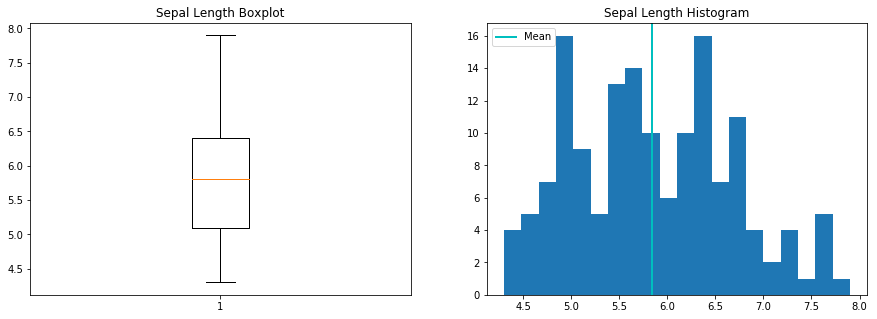

In [75]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(iris['sepal_length'].dropna(how = 'any'))
plt.title('Sepal Length Boxplot')

plt.subplot(1, 2, 2)
plt.hist(iris['sepal_length'].dropna(how = 'any'), bins=20)
plt.axvline(iris['sepal_length'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Sepal Length Histogram')

plt.show()

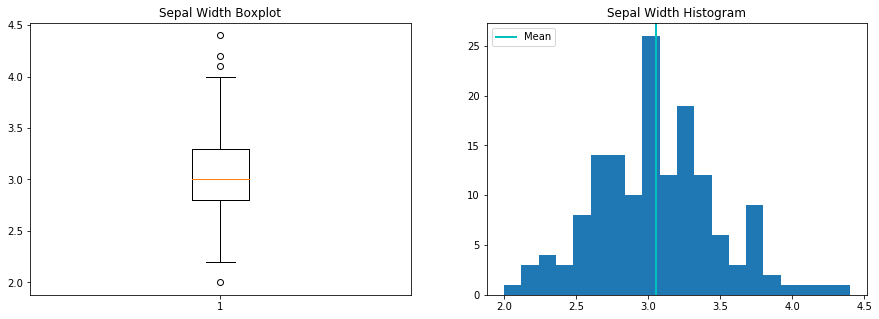

In [77]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(iris['sepal_width'].dropna(how = 'any'))
plt.title('Sepal Width Boxplot')

plt.subplot(1, 2, 2)
plt.hist(iris['sepal_width'].dropna(how = 'any'), bins=20)
plt.axvline(iris['sepal_width'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Sepal Width Histogram')

plt.show()

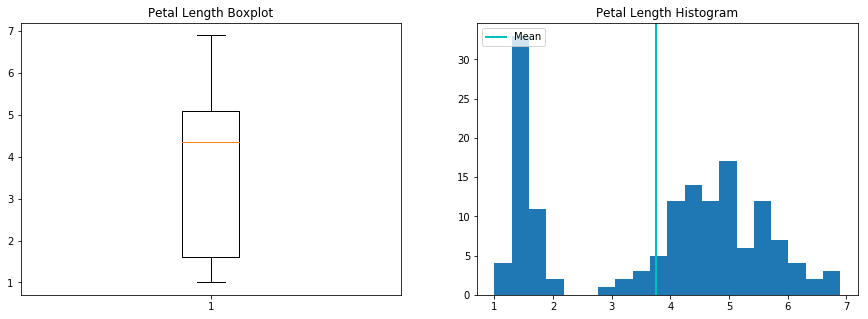

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(iris['petal_length'].dropna(how = 'any'))
plt.title('Petal Length Boxplot')

plt.subplot(1, 2, 2)
plt.hist(iris['petal_length'].dropna(how = 'any'), bins=20)
plt.axvline(iris['petal_length'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Petal Length Histogram')

plt.show()

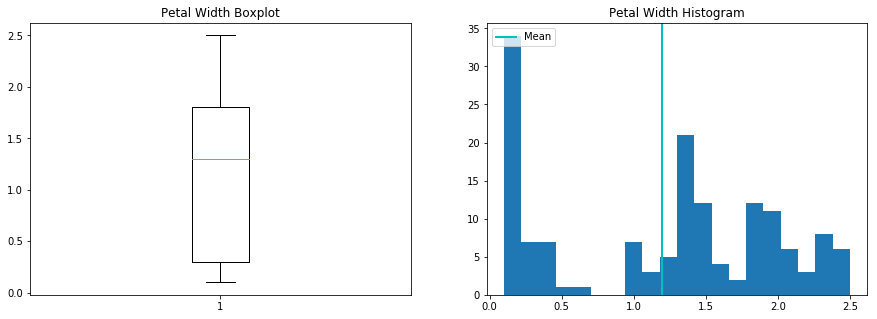

In [78]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(iris['petal_width'].dropna(how = 'any'))
plt.title('Petal Width Boxplot')

plt.subplot(1, 2, 2)
plt.hist(iris['petal_width'].dropna(how = 'any'), bins=20)
plt.axvline(iris['petal_width'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Petal Width Histogram')

plt.show()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

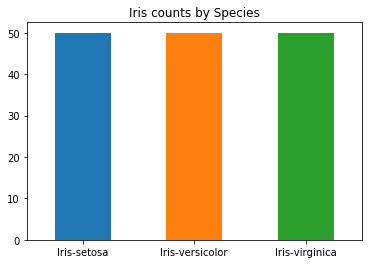

In [80]:
plt.title('Iris counts by Species')
pd.value_counts(iris['species']).plot.bar()
plt.xticks(rotation = 0)

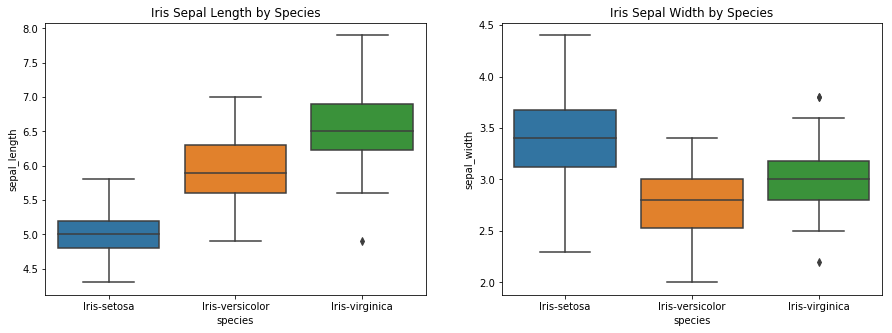

In [85]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Iris Sepal Length by Species')
sns.boxplot(x='species', y="sepal_length", data=iris)

plt.subplot(1, 2, 2)
plt.title('Iris Sepal Width by Species')
sns.boxplot(x='species',y="sepal_width", data=iris)

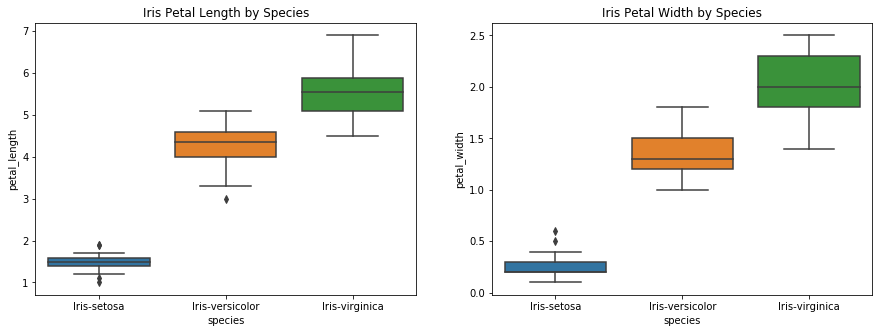

In [87]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Iris Petal Length by Species')
sns.boxplot(x='species', y="petal_length", data=iris)

plt.subplot(1, 2, 2)
plt.title('Iris Petal Width by Species')
sns.boxplot(x='species',y="petal_width", data=iris)

### KNN Regression

In [10]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = iris[['sepal_width', 'petal_length', 'petal_width']]
Y = iris['sepal_length']
knn.fit(X, Y)

#use cross validation to test
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.52 (+/- 0.39)


Tuning K

In [93]:
def knn_fit(k):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    return print("K of %d has Unweighted Accuracy: %0.2f (+/- %0.2f)" % (k, score.mean(), score.std() * 2))
    
for i in range(50):
    knn_fit(i + 1)

K of 1 has Unweighted Accuracy: 0.38 (+/- 0.66)
K of 2 has Unweighted Accuracy: 0.48 (+/- 0.46)
K of 3 has Unweighted Accuracy: 0.50 (+/- 0.50)
K of 4 has Unweighted Accuracy: 0.51 (+/- 0.52)
K of 5 has Unweighted Accuracy: 0.53 (+/- 0.47)
K of 6 has Unweighted Accuracy: 0.52 (+/- 0.43)
K of 7 has Unweighted Accuracy: 0.52 (+/- 0.42)
K of 8 has Unweighted Accuracy: 0.54 (+/- 0.40)
K of 9 has Unweighted Accuracy: 0.53 (+/- 0.39)
K of 10 has Unweighted Accuracy: 0.52 (+/- 0.39)
K of 11 has Unweighted Accuracy: 0.53 (+/- 0.37)
K of 12 has Unweighted Accuracy: 0.51 (+/- 0.38)
K of 13 has Unweighted Accuracy: 0.48 (+/- 0.41)
K of 14 has Unweighted Accuracy: 0.48 (+/- 0.39)
K of 15 has Unweighted Accuracy: 0.46 (+/- 0.41)
K of 16 has Unweighted Accuracy: 0.44 (+/- 0.43)
K of 17 has Unweighted Accuracy: 0.42 (+/- 0.44)
K of 18 has Unweighted Accuracy: 0.41 (+/- 0.45)
K of 19 has Unweighted Accuracy: 0.39 (+/- 0.49)
K of 20 has Unweighted Accuracy: 0.37 (+/- 0.53)
K of 21 has Unweighted Accura

In [94]:
# Test tuned k
knn = neighbors.KNeighborsRegressor(n_neighbors=8)
X = iris[['sepal_width', 'petal_length', 'petal_width']]
Y = iris['sepal_length']
knn.fit(X, Y)

#use cross validation to test
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.54 (+/- 0.40)


Testing Weight

In [99]:
def knn_weight_fit(k, weight_metric):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weight_metric)
    score = cross_val_score(knn, X, Y, cv=5)
    return print("K of %d has Weighted Accuracy: %0.2f (+/- %0.2f)" % (k, score.mean(), score.std() * 2))
    
for i in range(50):
    knn_weight_fit(i + 1, "distance")

K of 1 has Weighted Accuracy: 0.38 (+/- 0.66)
K of 2 has Weighted Accuracy: 0.50 (+/- 0.47)
K of 3 has Weighted Accuracy: 0.52 (+/- 0.48)
K of 4 has Weighted Accuracy: 0.53 (+/- 0.48)
K of 5 has Weighted Accuracy: 0.55 (+/- 0.45)
K of 6 has Weighted Accuracy: 0.55 (+/- 0.42)
K of 7 has Weighted Accuracy: 0.55 (+/- 0.42)
K of 8 has Weighted Accuracy: 0.56 (+/- 0.41)
K of 9 has Weighted Accuracy: 0.56 (+/- 0.39)
K of 10 has Weighted Accuracy: 0.56 (+/- 0.39)
K of 11 has Weighted Accuracy: 0.56 (+/- 0.38)
K of 12 has Weighted Accuracy: 0.56 (+/- 0.37)
K of 13 has Weighted Accuracy: 0.54 (+/- 0.38)
K of 14 has Weighted Accuracy: 0.54 (+/- 0.36)
K of 15 has Weighted Accuracy: 0.54 (+/- 0.36)
K of 16 has Weighted Accuracy: 0.53 (+/- 0.37)
K of 17 has Weighted Accuracy: 0.52 (+/- 0.37)
K of 18 has Weighted Accuracy: 0.51 (+/- 0.37)
K of 19 has Weighted Accuracy: 0.50 (+/- 0.38)
K of 20 has Weighted Accuracy: 0.50 (+/- 0.39)
K of 21 has Weighted Accuracy: 0.49 (+/- 0.40)
K of 22 has Weighted A

In [100]:
# Recomfirming from weighted K test
knn = neighbors.KNeighborsRegressor(n_neighbors=12, weights='distance')
X = iris[['sepal_width', 'petal_length', 'petal_width']]
Y = iris['sepal_length']
knn.fit(X, Y)

#use cross validation to test
score = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.56 (+/- 0.37)


Not very good accuracy, let's see what we can do with Ordinary Least Squares Regression

### OLS Regression

SKLearn

In [11]:
#write model
regr = linear_model.LinearRegression()
Y = iris['sepal_length'].values.reshape(-1, 1)
X = iris[['sepal_width', 'petal_length', 'petal_width']]
regr.fit(X, Y)

print('\nR-squared:')
print(regr.score(X, Y))


R-squared:
0.8592166649106592


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Comparison

A first look as the results from these models indicates that OLS is better than KNN with much higher accuracy (0.86 over 0.56).  Let's take a look at individual Cross Validation Scores to see how they compare.

In [101]:
#cross validation test for KNN
print('\nKNN Cross Validation Score:', cross_val_score(knn, X, Y, cv=10))

#cross validation test for OLS
print('\nOLS Cross Validation Score:', cross_val_score(regr, X, Y, cv=10))


KNN Cross Validation Score: [0.42709491 0.18232641 0.56768932 0.75337296 0.43113701 0.53566878
 0.64026021 0.65034005 0.65891423 0.37147285]

OLS Cross Validation Score: [0.63086579 0.38878195 0.22700745 0.8565237  0.262479   0.40395639
 0.59592532 0.8416528  0.7995874  0.09678229]


The average accuracy for OLS looks much better than KNN, but Cross Validation scores (with ten folds) for each method show different results.  The range for KNN is 0.382 (from 0.371 to 0.753).  The range for OLS is 0.760 (0.097 to 0.857).  This indicates that we should reconsider the judgement of OLS being better than KNN.  Let's take a look at the residuals for each model to get a better picture of accuracy

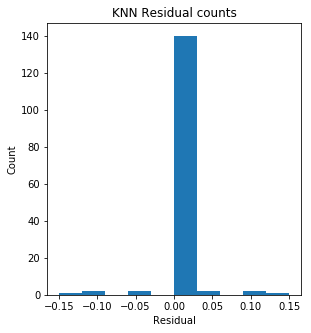

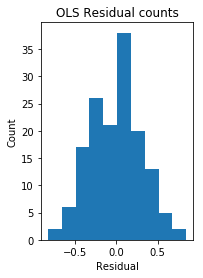

In [45]:
# Extract predicted values from KNN
knn_predicted = knn.predict(X).ravel()

# Extract predicted values from OLS
ols_predicted = regr.predict(X).ravel()

# define actual target values
actual = iris['sepal_length']

# Calculate the error/residual for knn
knn_residual = actual - knn_predicted

# Calculate the error/residual for ols
ols_residual = actual - ols_predicted

plt.figure(figsize=(10, 5))

# plot histogram of errors for knn
plt.subplot(1, 2, 1)
plt.hist(knn_residual)
plt.title('KNN Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# plot histogram of errors for ols
plt.subplot(1, 2, 2)
plt.hist(ols_residual)
plt.title('OLS Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

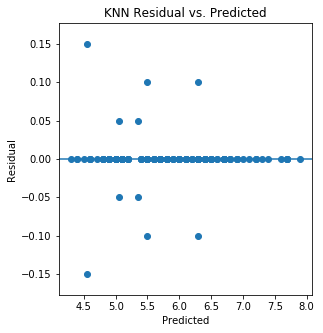

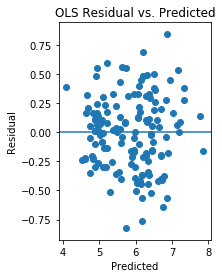

In [60]:
plt.figure(figsize=(10, 5))

# plot errors for knn predictions
plt.subplot(1, 2, 1)
plt.scatter(knn_predicted, knn_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('KNN Residual vs. Predicted')
plt.show()

# plot errors for ols predictions
plt.subplot(1, 2, 2)
plt.scatter(ols_predicted, ols_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('OLS Residual vs. Predicted')
plt.show()

That plot of errors by predicted value makes a strong distinction between the two models.  While KNN shows some errors, the vast majority of predictions are spot on.

I am curious if this result is related to the data and the strong correlation of the data

In [74]:
correlation_matrix = iris.groupby('species').corr()
display(correlation_matrix)

petal_length  petal_width  sepal_length  \
species                                                                 
Iris-setosa     petal_length      1.000000     0.306308      0.263874   
                petal_width       0.306308     1.000000      0.279092   
                sepal_length      0.263874     0.279092      1.000000   
                sepal_width       0.176695     0.279973      0.746780   
Iris-versicolor petal_length      1.000000     0.786668      0.754049   
                petal_width       0.786668     1.000000      0.546461   
                sepal_length      0.754049     0.546461      1.000000   
                sepal_width       0.560522     0.663999      0.525911   
Iris-virginica  petal_length      1.000000     0.322108      0.864225   
                petal_width       0.322108     1.000000      0.281108   
                sepal_length      0.864225     0.281108      1.000000   
                sepal_width       0.401045     0.537728      0.457228   

                              sepal_width  
species                                    
Iris-setosa     petal_length     0.176695  
                petal_width      0.279973  
                sepal_length     0.746780  
                sepal_width      1.000000  
Iris-versicolor petal_length     0.560522  
                petal_width      0.663999  
                sepal_length     0.525911  
                sepal_width      1.000000  
Iris-virginica  petal_length     0.401045  
                petal_width      0.537728  
                sepal_length     0.457228  
                sepal_width      1.000000

The data seems to grouped within each species, so KNN better accounts for the impact of that categorical variable by looking at only similar values of other variables, rather than considering all values.  A separate OLS model for each species would also account for that variation.